# NBA Data Science Analysis

In [10]:
#Import Excel data - done
#Create new List of average fantasy points for each player - done
#Join back into original data set - done
#Add in different Moving Averages/Forecasts by player to test accuracy of forecasting

import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [11]:
file = (r'C:\Users\zacha\OneDrive\Documents\NBA_Data_2021.xlsx')
df = pd.read_excel(file, sheet_name = 0, header=0)
df.describe()

,MIN,PTS,FGM,FGA,3PM,3PA,FTM,FTA,OREB,DREB,...,TOV,PF,+/-,FPTS,FPTS/MIN,AVG_FPTS,PTS_DIFF,OPP_POS_FPTS,OPP_POS_FPTS/MIN,OPP_PTS_DIFF
count,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,...,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,10897.000000,1.089700e+04,10897.000000,10897.000000,10897.000000
mean,22.795540,10.571258,3.872993,8.337341,1.211710,3.288612,1.613563,2.073323,0.923006,3.257961,...,1.272460,1.855098,0.003395,21.331009,0.884112,21.331009,7.694232e-17,21.355180,0.884580,0.002365
std,10.481928,8.718371,3.227830,5.944709,1.493518,2.989877,2.288597,2.753126,1.306836,2.735761,...,1.407842,1.448587,11.330872,14.574311,0.442311,11.535865,8.906983e+00,2.427950,0.100518,1.225560
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-41.000000,-2.300000,-1.000000,-2.300000,-3.637241e+01,15.921875,0.688095,-3.298833
25%,16.000000,4.000000,1.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,1.000000,-7.000000,10.200000,0.600000,12.606667,-5.887879e+00,19.481308,0.804061,-0.840105
50%,24.000000,9.000000,3.000000,7.000000,1.000000,3.000000,1.000000,1.000000,0.000000,3.000000,...,1.000000,2.000000,0.000000,19.200000,0.869697,20.057143,-6.466667e-01,20.620548,0.864926,0.018700
75%,31.000000,15.000000,6.000000,12.000000,2.000000,5.000000,2.000000,3.000000,1.000000,5.000000,...,2.000000,3.000000,7.000000,30.300000,1.146875,28.071429,5.445455e+00,23.275714,0.949098,0.787390
max,51.000000,62.000000,21.000000,37.000000,11.000000,21.000000,19.000000,24.000000,12.000000,19.000000,...,10.000000,6.000000,40.000000,93.900000,5.400000,57.328571,4.627500e+01,27.155556,1.155864,3.154137


### Merge DataFrames to Add Averages for Comparison

In [12]:
df2 = df.where(df['AVG_FPTS']>10)

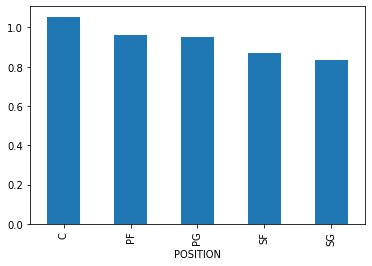

In [13]:
df2.groupby("POSITION")["FPTS/MIN"].mean().sort_values(ascending = False).plot(kind = "bar", sort_columns = True)

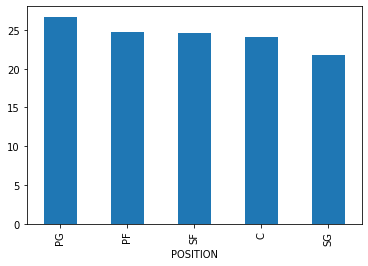

In [14]:
df2.groupby("POSITION")["AVG_FPTS"].mean().sort_values(ascending = False).plot(kind = "bar", sort_columns = True)

In [15]:
pg = df.where(df['POSITION']=='PG')
sg = df.where(df['POSITION']=='SG')
sf = df.where(df['POSITION']=='SF')
pf = df.where(df['POSITION']=='PF')
c = df.where(df['POSITION']=='C')

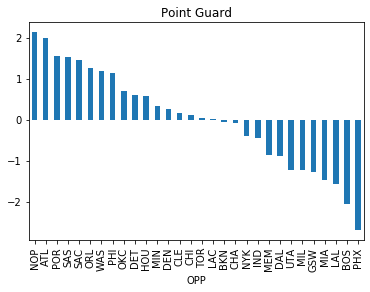

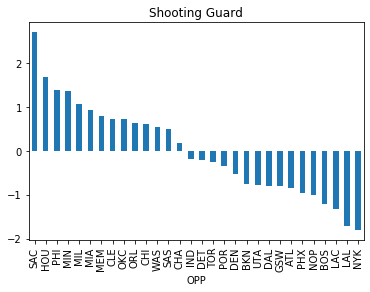

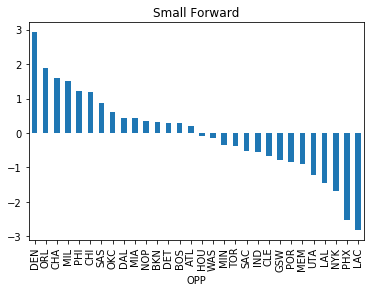

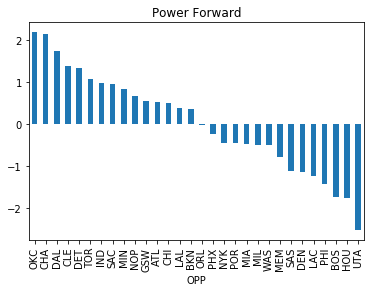

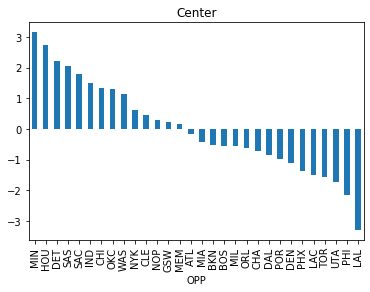

In [16]:
pg = df.where(df['POSITION']=='PG')
sg = df.where(df['POSITION']=='SG')
sf = df.where(df['POSITION']=='SF')
pf = df.where(df['POSITION']=='PF')
c = df.where(df['POSITION']=='C')
pg.groupby("OPP")['PTS_DIFF'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Point Guard')
plt.show()
sg.groupby("OPP")['PTS_DIFF'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Shooting Guard')
plt.show()
sf.groupby("OPP")['PTS_DIFF'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Small Forward')
plt.show()
pf.groupby("OPP")['PTS_DIFF'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Power Forward')
plt.show()
c.groupby("OPP")['PTS_DIFF'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Center')
plt.show()

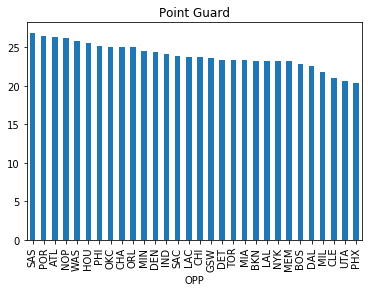

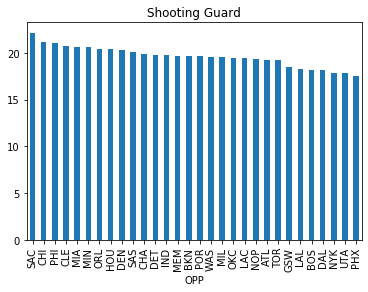

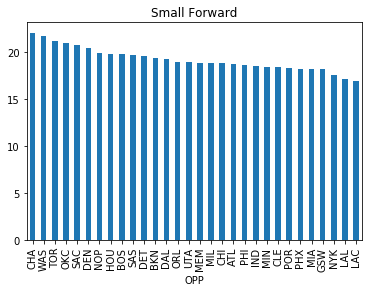

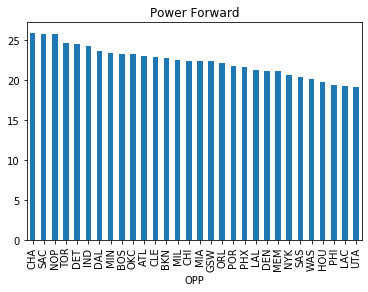

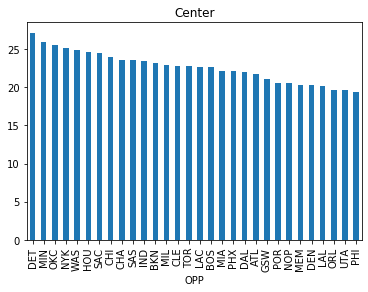

In [17]:
pg.groupby("OPP")['FPTS'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Point Guard')
plt.show()
sg.groupby("OPP")['FPTS'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Shooting Guard')
plt.show()
sf.groupby("OPP")['FPTS'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Small Forward')
plt.show()
pf.groupby("OPP")['FPTS'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Power Forward')
plt.show()
c.groupby("OPP")['FPTS'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Center')
plt.show()

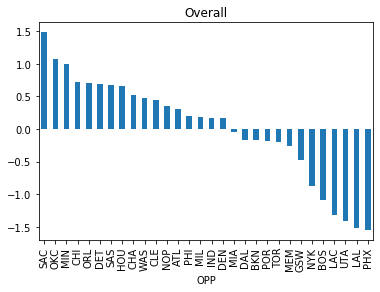

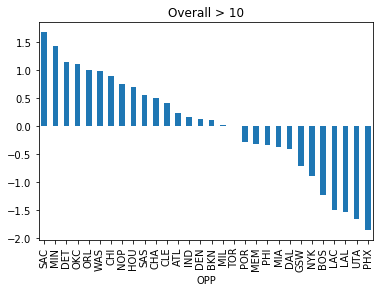

In [18]:
df.groupby("OPP")['PTS_DIFF'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Overall')
plt.show()
df2.groupby("OPP")['PTS_DIFF'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Overall > 10')
plt.show()

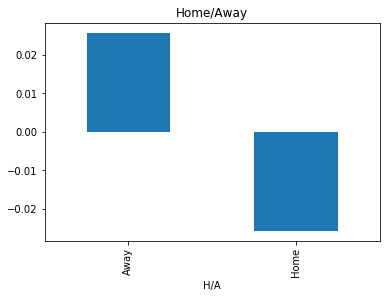

In [19]:
df.groupby("H/A")['PTS_DIFF'].mean().sort_values(ascending = False).plot(kind = 'bar', title = 'Home/Away')

In [20]:
for x in range(2,11):
    forecast = df.groupby('PLAYER').rolling(x)['FPTS'].mean().reset_index(drop=True)
    MAD = (forecast - df['FPTS']).abs()
    MSD = (forecast - df['FPTS']).abs().pow(2)
    MAPE = (((df['FPTS']- forecast)/df['FPTS']).abs())
    print(x,MAD.mean(), MSD.mean(), MAPE.median())

2 8.2184286400769 153.19018668909243 0.28859060402684555
3 8.698870512303353 157.06804849625527 0.3185941043083902
4 8.946536016949166 160.2897220603812 0.3256578947368423
5 9.097697793626006 162.9828562068201 0.32847198723836246
6 9.21066189414386 164.983613197458 0.3377831715210356
7 9.297319770013262 164.76989337208602 0.34183673469387754
8 9.342387107329802 164.86739219977105 0.34071314193940805
9 9.367345901487825 164.9403255501136 0.33816217797105896
10 9.370301559282122 164.3712129008533 0.33523506289308186


In [21]:
for x in range(2,11):
    forecast = df2.groupby('PLAYER').rolling(x)['FPTS'].mean().reset_index(drop=True)
    MAD = (forecast - df2['FPTS']).abs()
    MSD = (forecast - df2['FPTS']).abs().pow(2)
    MAPE = (((df2['FPTS']- forecast)/df2['FPTS']).abs())
    print(x,MAD.mean(), MSD.mean(), MAPE.median())

2 14.541259021651989 341.25056936648065 0.5057602772340086
3 14.228835978835955 326.118854389058 0.49704398797469196
4 14.072106868012252 319.090291128213 0.48863636363636387
5 13.920227514030058 313.2650639769441 0.4835365853658537
6 13.930410980641042 312.5157376406053 0.48125130289764434
7 13.88742372800877 310.7753721598331 0.479235880398671
8 13.834107766143124 307.91163298974647 0.47771476278212816
9 13.81738979662608 306.7440696770451 0.47222222222222227
10 13.736695668986867 303.1862091453984 0.47396525536358464


In [22]:
tab = pd.DataFrame(columns = ['Forecast','MAD','ACC'])
forecasts = ('MA2', 'MA3', 'MA4', 'MA5', 'MA6', 'MA7', 'MA8', 'MA9', 'MA10')
tab['Forecast'] = forecasts

for x in range(2,11):
    forecast = ((df.groupby('PLAYER').rolling(x)['FPTS'].mean().reset_index(drop=True))+df['OPP_PTS_DIFF'])
    MAD = (forecast - df['FPTS']).abs()
    MSD = (forecast - df['FPTS']).abs().pow(2)
    MAPE = (((df['FPTS']- forecast)/df['FPTS']).abs())
    print(x,MAD.mean(), MSD.mean(), MAPE.median())

2 8.229970122266657 152.91323836373317 0.29101612313001357
3 8.67833931970253 156.46660416924107 0.31778684452814
4 8.907392606708584 159.35467244613446 0.32448512402719437
5 9.051755268501717 161.92591784383885 0.3293137991487973
6 9.15354981124761 163.83066048015695 0.33522121027698687
7 9.233830528803672 163.51667962933388 0.33542785098425604
8 9.28887759477466 163.60037372945757 0.3386977964100601
9 9.31601432969188 163.66340467961749 0.3365860411818339
10 9.319547681449233 163.0949262604414 0.3340061458953267


In [23]:
tab = pd.DataFrame(columns = ['Forecast','MAD','ACC'])
forecasts = ('EMA2', 'EMA3', 'EMA4', 'EMA5', 'EMA6', 'EMA7', 'EMA8', 'EMA9', 'EMA10')
tab['Forecast'] = forecasts

for k in range(2,11):
    forecast = (df.groupby(['PLAYER'])['FPTS'].transform(lambda x: x.ewm(span=k).mean()))
    MAD = (forecast - df['FPTS']).abs()
    MSD = (forecast - df['FPTS']).abs().pow(2)
    MAPE = (((df['FPTS']- forecast)/df['FPTS']).abs())
    print(k, MAD.mean(), MSD.mean(), MAPE.median())

2 2.6249693076568126 12.079263311300448 0.1151798118728595
3 3.722187589327937 24.215862429297285 0.16221177996257963
4 4.330478412144739 32.72638544622812 0.18760673624288438
5 4.715681538879975 38.80005913271276 0.20266214502251734
6 4.9805816520917405 43.2987826152066 0.2136889901333135
7 5.175157403777559 46.744238121897034 0.22138466860881975
8 5.323534145304521 49.45742264259201 0.2274632084253503
9 5.440338072862717 51.6436677023275 0.23308179373753157
10 5.534697939786064 53.43945536225198 0.23636777874888865


In [24]:
tab = pd.DataFrame(columns = ['Forecast','MAD','ACC'])
forecasts = ('EMA2', 'EMA3', 'EMA4', 'EMA5', 'EMA6', 'EMA7', 'EMA8', 'EMA9', 'EMA10')
tab['Forecast'] = forecasts

for k in range(2,11):
    forecast = ((df.groupby(['PLAYER'])['FPTS'].transform(lambda x: x.ewm(span=k).mean()))+df['OPP_PTS_DIFF'])
    MAD = (forecast - df['FPTS']).abs()
    MSD = (forecast - df['FPTS']).abs().pow(2)
    MAPE = (((df['FPTS']- forecast)/df['FPTS']).abs())
    print(k,MAD.mean(), MSD.mean(), MAPE.median())

2 2.7490532772406526 12.654474587308032 0.12147569401483367
3 3.7844119483635286 24.306646747885043 0.16725448716820296
4 4.368204089984179 32.52343672468328 0.19329790683217854
5 4.740070261630076 38.40309306033143 0.20891244656086427
6 4.9970168107235375 42.76585800013133 0.2199590143656886
7 5.185682711860523 46.111762679229265 0.22672153549074162
8 5.330069890920164 48.74953743878473 0.2317955336295165
9 5.44395133773139 50.87709137083792 0.23613647807481947
10 5.535900004480302 52.626174483206974 0.23902644411143656


In [25]:
df['MA10'] = df.groupby('PLAYER').rolling(10)['FPTS'].mean().reset_index(drop=True)+df['PTS_DIFF']
df['MA10'].describe()

count    6798.000000
mean       23.063253
std        14.963120
min       -13.791250
25%        12.022933
50%        21.277857
75%        32.319026
max        98.107586
Name: MA10, dtype: float64

In [26]:
df['EMA2'] = ((df.groupby(['PLAYER'])['FPTS'].transform(lambda x: x.ewm(span=2).mean()))+df['OPP_PTS_DIFF'])
df['EMA2_DIFF']= (df['EMA2']-df['FPTS']).abs()
df['EMA2_DIFF'].describe()

count    10897.000000
mean         2.749053
std          2.257797
min          0.000613
25%          1.004238
50%          2.175883
75%          3.928820
max         17.303737
Name: EMA2_DIFF, dtype: float64

In [27]:
df.head(10)

,PLAYER,TEAM,OPP,H/A,GAME DATE,W/L,MIN,PTS,FGM,FGA,...,AVG_FPTS,PTS_DIFF,POSITION,OPP_POS,OPP_POS_FPTS,OPP_POS_FPTS/MIN,OPP_PTS_DIFF,MA10,EMA2,EMA2_DIFF
0,Aaron Gordon,ORL,MIA,Home,2020-12-23,W,26,20,8,11,...,30.705263,7.694737,PF,MIA-PF,22.396774,0.996979,-0.478785,NaN,37.921215,0.478785
1,Aaron Gordon,ORL,WAS,Away,2020-12-26,W,30,15,6,12,...,30.705263,-0.405263,PF,WAS-PF,20.168116,0.895299,-0.498013,NaN,31.826987,1.526987
2,Aaron Gordon,ORL,WAS,Away,2020-12-27,W,20,4,1,4,...,30.705263,-19.505263,PF,WAS-PF,20.168116,0.895299,-0.498013,NaN,17.201987,6.001987
3,Aaron Gordon,ORL,OKC,Away,2020-12-29,W,22,12,5,10,...,30.705263,-6.705263,PF,OKC-PF,23.250725,0.946417,2.186658,NaN,24.139158,0.139158
4,Aaron Gordon,ORL,PHI,Home,2020-12-31,L,21,6,1,8,...,30.705263,-15.605263,PF,PHI-PF,19.431884,0.831993,-1.426305,NaN,15.938985,0.838985
5,Aaron Gordon,ORL,OKC,Home,2021-01-02,L,28,15,6,15,...,30.705263,1.394737,PF,OKC-PF,23.250725,0.946417,2.186658,NaN,29.388581,2.711419
6,Aaron Gordon,ORL,CLE,Home,2021-01-04,W,28,24,9,17,...,30.705263,8.994737,PF,CLE-PF,22.928125,0.972503,1.386347,NaN,36.924132,2.775868
7,Aaron Gordon,ORL,CLE,Home,2021-01-06,W,27,15,5,7,...,30.705263,-0.605263,PF,CLE-PF,22.928125,0.972503,1.386347,NaN,33.298389,3.198389
8,Aaron Gordon,ORL,DAL,Away,2021-01-09,L,36,16,6,16,...,30.705263,1.594737,PF,DAL-PF,23.598276,0.954652,1.751134,NaN,33.921828,1.621828
9,Aaron Gordon,ORL,MIL,Home,2021-01-11,L,35,21,8,14,...,30.705263,13.294737,PF,MIL-PF,22.452055,0.956974,-0.488812,43.014737,39.568220,4.431780


In [28]:
file = r'C:\Users\zacha\OneDrive\Documents\NBA_Data_Analysis_2021.xlsx'
writer = pd.ExcelWriter(file)
df.to_excel(writer, sheet_name='Data')
writer.save()

In [29]:
#Retrieve data on Opponent defensive and pace stats
#df['OPP_DEF_RTNG'] = preprocessing.scale(df['OPP_DEF_RTNG'])
#df['OPP_PACE'] =  preprocessing.scale(df['OPP_PACE'])
#df['OPP_PTS_PAINT'] =  preprocessing.scale(df['OPP_PTS_PAINT'])
#df['H/A'] = df['H/A'].apply(HomeAway)
#df['DAYS_REST'] = df['DAYS_REST'].apply(daysrest)
#df['POSITION'] = df['POSITION'].apply(POS)
#df['OPP_POS_FPTS_MIN'] = preprocessing.scale(df['OPP_POS_FPTS_MIN'])

### Linear Regression

In [30]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, train_size = 0.7)
train_X = np.array(train.loc[:, ['POSITION', 'OPP_POS_FPTS_MIN','OPP_DEF_RTNG','OPP_PACE','OPP_PTS_PAINT','H/A','DAYS_REST']])
train_y = np.array(train.loc[:, 'gg'])
test_X = np.array(test.loc[:, ['POSITION', 'OPP_POS_FPTS_MIN','OPP_DEF_RTNG','OPP_PACE','OPP_PTS_PAINT','H/A','DAYS_REST']])
test_y = np.array(test.loc[:, 'gg'])

C:\Users\zacha\Anaconda3\lib\site-packages\pandas\core\indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


KeyError: 'gg'

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(train_y, train_X)
result=logit_model.fit()
print(result.summary2())

In [ ]:
print(df.columns)

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
#logreg = LogisticRegression()
#logreg.fit(X_train, y_train)
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=0, solver='lbfgs', multi_class='ovr').fit(train_X, train_y)
LR.predict(test_X)
round(LR.score(train_X,train_y), 4)

### Support Vector Machines Classification

In [ ]:
from sklearn import svm
SVM = svm.LinearSVC()
SVM.fit(train_X, train_y)
SVM.predict(test_X)
round(SVM.score(train_X,train_y), 4)

### Random Forests Classification

In [ ]:
RF = RandomForestClassifier(n_estimators=100, max_depth=2, random_state=0)
RF.fit(X, y)
RF.predict(X.iloc[460:,:])
round(RF.score(X,y), 4)

### Neural Networks 

In [ ]:
NN = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
NN.fit(X, y)
NN.predict(X.iloc[460:,:])
round(NN.score(X,y), 4)